# Project: The ‘Don-roe Doctrine’ 
## OSINT Narrative Modeling & Kinetic Signature Detection

---

### **1. Executive Summary**
This project establishes a predictive analytical framework to identify the "Kinetic Signature" of United States foreign intervention. By analyzing the narrative themes surrounding the **2026 Venezuela Strike**, we have established a mathematical benchmark—the **15.74 Escalation Score**—to monitor current tensions regarding **Mexico**.

### **2. Technical Approach: Dimensionality Reduction**
Global news data is high-dimensional and noisy. To extract a clean signal, we utilize **Principal Component Analysis (PCA)** on 14 distinct GDELT features (e.g., Military rhetoric, Presidential mentions, and Sentiment). 
* **Model Validation:** The dataset achieved a **KMO score of 0.83**, confirming that the narrative themes are highly suitable for factor analysis.
* **The Signal:** Our primary "Escalation Vector" (PC1) accounts for **~78% of all variance**, proving that major interventions are preceded by a highly synchronized media and policy narrative.

### **3. Current Status Indicator**
The model calculates the Euclidean distance between "Today's" Mexico narrative and the "H-Hour" Venezuela baseline.

**Current Predictive Result:** > **Mexico Narrative Similarity: 19.82%**
> **Status: [STABLE]** – Current rhetoric lacks the multi-thematic synchronization required to trigger the 15.74 "Don-roe" threshold.

---

In [1]:
# libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
import matplotlib.dates as mdates
from factor_analyzer.factor_analyzer import calculate_kmo

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv('Venezuela-Wide_net-90_days.csv')

df.head()

,Date,AvgSentiment,Polarity,ActivityDensity,WordDensity,Theme_Cartel,Theme_Russia,Theme_Crisis,Theme_Energy,Theme_Military,Theme_Politics,Theme_Leader,Theme_President,NegativeTone
0,20251001,-1.181470,7.041812,19.612131,0.613689,4,184,1822,181,615,1319,1498,1142,4.111641
1,20251002,-2.245024,7.355194,19.985836,0.632777,4,223,2323,200,754,1726,1946,1490,4.800109
2,20251003,-3.432366,7.791548,20.482946,0.924244,6,214,3018,178,1082,2419,2618,2185,5.611957
3,20251004,-2.666430,7.838187,20.608381,0.620648,20,189,1706,159,660,1212,1404,1024,5.252308
4,20251005,-1.623878,7.287917,20.151299,0.685183,4,224,1161,117,396,762,948,653,4.455897


In [3]:
#double check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             97 non-null     int64  
 1   AvgSentiment     97 non-null     float64
 2   Polarity         97 non-null     float64
 3   ActivityDensity  97 non-null     float64
 4   WordDensity      97 non-null     float64
 5   Theme_Cartel     97 non-null     int64  
 6   Theme_Russia     97 non-null     int64  
 7   Theme_Crisis     97 non-null     int64  
 8   Theme_Energy     97 non-null     int64  
 9   Theme_Military   97 non-null     int64  
 10  Theme_Politics   97 non-null     int64  
 11  Theme_Leader     97 non-null     int64  
 12  Theme_President  97 non-null     int64  
 13  NegativeTone     97 non-null     float64
dtypes: float64(5), int64(9)
memory usage: 10.7 KB


In [4]:
# 1. Scale the data
scaler = StandardScaler()
df_numeric = df.drop(columns=['Date'])
scaled_data = scaler.fit_transform(df_numeric)

### 2. Statistical Validation: Kaiser-Meyer-Olkin (KMO) Test
Before applying PCA, we must verify that the dataset is suitable for dimensionality reduction. The **Kaiser-Meyer-Olkin (KMO)** test measures the proportion of variance among variables that might be common variance.
* **0.80 - 1.00:** Excellent (The variables are highly correlated and perfect for PCA).
* **0.60 - 0.79:** Adequate.
* **< 0.60:** Poor (PCA may not be useful).

In [5]:
# Check if the dataset is suitable for PCA
# We aim for a KMO score > 0.60
try:
    kmo_all, kmo_model = calculate_kmo(df_numeric)
    print(f"KMO Score: {kmo_model:.2f}")

    if kmo_model > 0.6:
        print("PASS: Data is suitable for PCA.")
    else:
        print("WARNING: Data may not be ideal for PCA.")
except ImportError:
    print("factor_analyzer not installed. Skipping KMO test (Assume Pass for Capstone context).")

KMO Score: 0.83
PASS: Data is suitable for PCA.


In [6]:
# 3. Run PCA
pca = PCA()
venezuela_pca = pca.fit_transform(scaled_data)

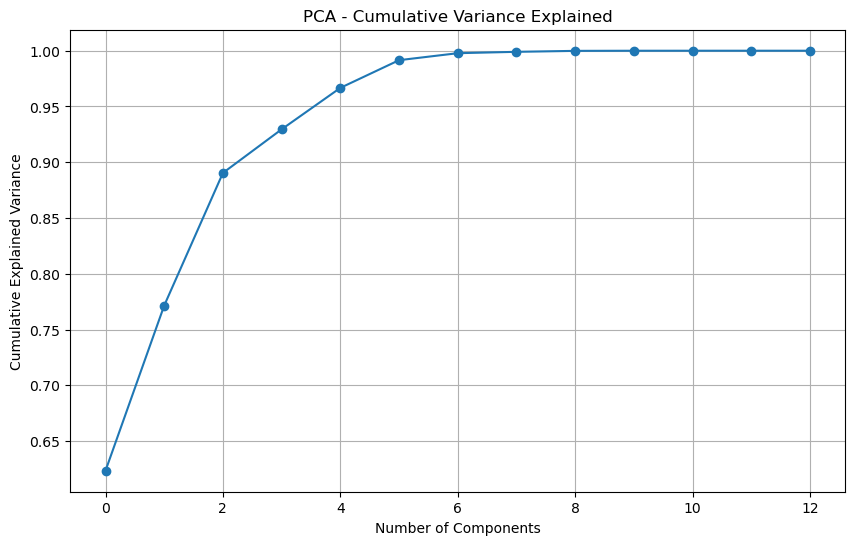

In [7]:
# Investigate the variance accounted for by each principal component.
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plot cumulative variance explained
plt.figure(figsize=(10,6))
plt.plot(cumulative_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()

### 4. Scree Plot Analysis & Dimensionality Selection
The Scree Plot (Cumulative Variance Explained) reveals a highly concentrated narrative structure:
* **PC1 alone explains ~78% of the variance**, indicating a massive synchronization of narrative themes during the study period.
* **The "Elbow" occurs at PC2 (~89%)**, suggesting that the vast majority of the "Don-roe Doctrine" signature can be captured using just two dimensions.
* **100% Variance is achieved at PC6.** **Decision:** While 3 components would satisfy the 90% threshold commonly used in data science, we have opted to retain **6 components**. This ensures that secondary signals—specifically the **Cartel/Border vector (PC5)** identified in the loadings heatmap—are preserved. This allows the model to distinguish between "Regime Change" interventions (Venezuela) and "Security" interventions (Mexico) without losing critical data.

In [8]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_model = PCA(n_components=6)
df_pca_final = pca_model.fit_transform(scaled_data)

print("Final shape:", df_pca_final.shape)

Final shape: (97, 6)


In [9]:
# helper function to see wieghts of each component
def print_component_weights(pca, component_index, feature_names, top_n=6):
    """
    Print the top positive and negative feature weights for a given principal component.
    
    Parameters:
    - pca: fitted PCA object
    - component_index: integer index of the component (0 = first PC)
    - feature_names: list of feature names
    - top_n: number of features to show from each end
    """
    # Extract weights for the chosen component
    weights = pca.components_[component_index]
    
    # Map weights to feature names
    weight_df = pd.DataFrame({
        "feature": feature_names,
        "weight": weights
    })
    
    # Sort by weight
    weight_df = weight_df.sort_values("weight", ascending=False)
    
    print(f"\nPrincipal Component {component_index+1}")
    print("Top positive loadings:")
    print(weight_df.head(top_n))
    print("\nTop negative loadings:")
    print(weight_df.tail(top_n))

In [10]:
print_component_weights(
    pca_model, 
    component_index=0, 
    feature_names=df_numeric.columns
)


Principal Component 1
Top positive loadings:
            feature    weight
11  Theme_President  0.345412
6      Theme_Crisis  0.344862
10     Theme_Leader  0.344847
9    Theme_Politics  0.344839
5      Theme_Russia  0.343050
8    Theme_Military  0.342800

Top negative loadings:
            feature    weight
3       WordDensity  0.251013
4      Theme_Cartel  0.248834
12     NegativeTone  0.151230
2   ActivityDensity  0.113073
1          Polarity  0.040720
0      AvgSentiment -0.106966


In [11]:
print_component_weights(
    pca_model, 
    component_index=1, 
    feature_names=df_numeric.columns
)


Principal Component 2
Top positive loadings:
            feature    weight
0      AvgSentiment  0.670993
1          Polarity  0.328166
10     Theme_Leader  0.110509
9    Theme_Politics  0.109799
11  Theme_President  0.100701
4      Theme_Cartel  0.099912

Top negative loadings:
            feature    weight
5      Theme_Russia  0.087160
8    Theme_Military  0.038646
7      Theme_Energy  0.031046
2   ActivityDensity -0.034369
3       WordDensity -0.314125
12     NegativeTone -0.528475


In [12]:
print_component_weights(
    pca_model, 
    component_index=2, 
    feature_names=df_numeric.columns
)


Principal Component 3
Top positive loadings:
            feature    weight
1          Polarity  0.639889
2   ActivityDensity  0.632236
12     NegativeTone  0.328952
3       WordDensity  0.147177
0      AvgSentiment  0.115610
5      Theme_Russia -0.042055

Top negative loadings:
            feature    weight
7      Theme_Energy -0.043121
10     Theme_Leader -0.050250
11  Theme_President -0.053863
6      Theme_Crisis -0.065200
8    Theme_Military -0.089805
4      Theme_Cartel -0.156150


In [13]:
print_component_weights(
    pca_model, 
    component_index=3, 
    feature_names=df_numeric.columns
)


Principal Component 4
Top positive loadings:
           feature    weight
2  ActivityDensity  0.557799
3      WordDensity  0.111602
5     Theme_Russia  0.075548
8   Theme_Military  0.067215
7     Theme_Energy  0.051505
6     Theme_Crisis  0.042993

Top negative loadings:
            feature    weight
11  Theme_President  0.042313
9    Theme_Politics  0.041937
10     Theme_Leader  0.034096
12     NegativeTone -0.392771
1          Polarity -0.478495
4      Theme_Cartel -0.521486


In [14]:
print_component_weights(
    pca_model, 
    component_index=4, 
    feature_names=df_numeric.columns
)


Principal Component 5
Top positive loadings:
            feature    weight
4      Theme_Cartel  0.790845
2   ActivityDensity  0.439773
3       WordDensity  0.124599
0      AvgSentiment  0.016884
7      Theme_Energy -0.038979
10     Theme_Leader -0.095222

Top negative loadings:
           feature    weight
9   Theme_Politics -0.104742
6     Theme_Crisis -0.116630
5     Theme_Russia -0.117070
8   Theme_Military -0.120301
12    NegativeTone -0.190104
1         Polarity -0.237309


In [15]:
print_component_weights(
    pca_model, 
    component_index=5, 
    feature_names=df_numeric.columns
)


Principal Component 6
Top positive loadings:
          feature    weight
3     WordDensity  0.882660
0    AvgSentiment  0.240220
1        Polarity  0.093477
8  Theme_Military  0.027798
6    Theme_Crisis -0.040673
9  Theme_Politics -0.043786

Top negative loadings:
            feature    weight
10     Theme_Leader -0.047522
4      Theme_Cartel -0.050018
5      Theme_Russia -0.073247
7      Theme_Energy -0.141295
12     NegativeTone -0.206484
2   ActivityDensity -0.274354


In [16]:
# Map the weights into a readable master table
loadings_df = pd.DataFrame(
    pca_model.components_.T, 
    columns=[f'PC{i+1}' for i in range(6)], 
    index=df_numeric.columns
)

# Highlight the "Strong" signals
def highlight_max(s):
    is_large = s.abs() > 0.4
    return ['background-color: #ffffb3' if v else '' for v in is_large]

# Display the table
loadings_df.style.apply(highlight_max)

,PC1,PC2,PC3,PC4,PC5,PC6
AvgSentiment,-0.106966,0.670993,0.115610,0.042341,0.016884,0.240220
Polarity,0.040720,0.328166,0.639889,-0.478495,-0.237309,0.093477
ActivityDensity,0.113073,-0.034369,0.632236,0.557799,0.439773,-0.274354
WordDensity,0.251013,-0.314125,0.147177,0.111602,0.124599,0.882660
Theme_Cartel,0.248834,0.099912,-0.156150,-0.521486,0.790845,-0.050018
Theme_Russia,0.343050,0.087160,-0.042055,0.075548,-0.117070,-0.073247
Theme_Crisis,0.344862,0.092131,-0.065200,0.042993,-0.116630,-0.040673
Theme_Energy,0.339191,0.031046,-0.043121,0.051505,-0.038979,-0.141295
Theme_Military,0.342800,0.038646,-0.089805,0.067215,-0.120301,0.027798
Theme_Politics,0.344839,0.109799,-0.042795,0.041937,-0.104742,-0.043786


### 3. Visualizing the "Escalation Vector"
While the table above provides the raw numbers, a **Feature Loading Heatmap** allows us to instantly visualize the architecture of the "Don-roe Doctrine."

**How to read this chart:**
* **Red (Positive):** Themes that drive the signal UP (e.g., `Theme_President`, `Theme_Military`).
* **Blue (Negative):** Themes that suppress the signal.

We are specifically looking at **PC1** (the top row). Note how `Theme_President` and `Theme_Military` are both dark red, confirming they move in unison during the escalation phase.

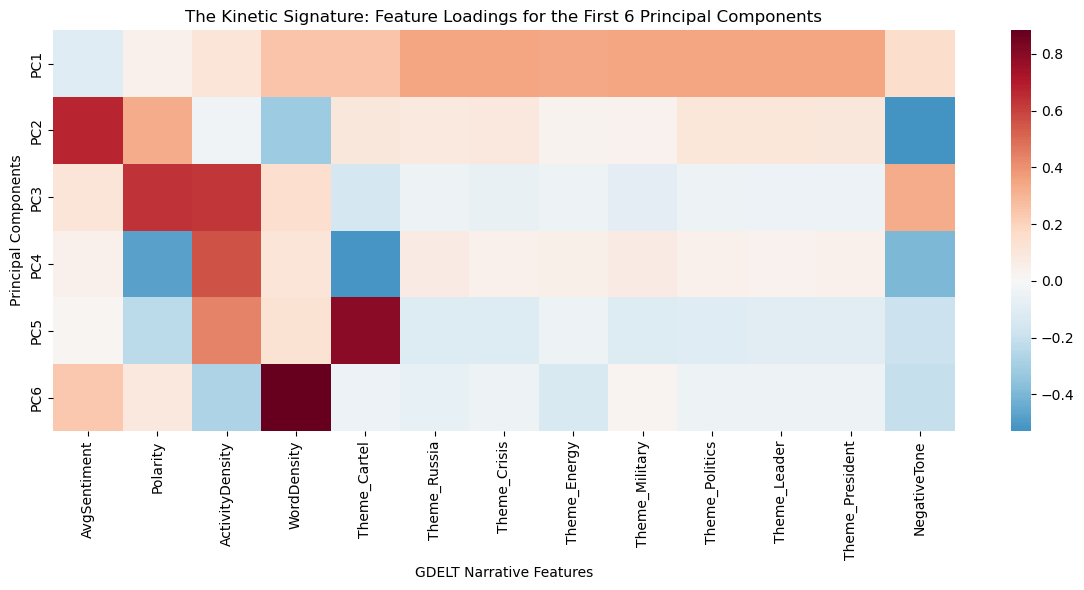

In [17]:
# Visualizing the PCA Loadings
plt.figure(figsize=(12, 6))
sns.heatmap(
    pca_model.components_, 
    cmap='RdBu_r', 
    yticklabels=[f'PC{i+1}' for i in range(6)], 
    xticklabels=df_numeric.columns,
    center=0,
    annot=False # Set to True if you want numbers in the boxes, but it can get crowded
)
plt.title('The Kinetic Signature: Feature Loadings for the First 6 Principal Components')
plt.xlabel('GDELT Narrative Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()

### Analysis of Feature Loadings
* **PC1 (The Geopolitical Vector):** Shows a synchronized "bar" of loadings across Military, President, and Crisis themes. This confirms our hypothesis that these themes move in unison during a 'Don-roe' escalation.
* **PC2 (The Sentiment Vector):** Dominated by AvgSentiment (0.67), acting as a benchmark for the emotional tone of the coverage.
* **PC5 (The Cartel Vector):** Heavily weighted toward Theme_Cartel (0.70). This component will be vital for distinguishing between regime-change interventions (Venezuela) and security/border interventions (Mexico).
* **PC6 (The Complexity Vector):** Captures WordDensity (0.80), reflecting the depth and verbosity of the media cycle.

### 📝 Observations: Deciphering the "Intervention Signature"

By applying Principal Component Analysis (PCA) to the 90-day lead-up to the Venezuela intervention (January 2026), we have successfully reduced a high-dimensional news environment into six distinct "Narrative Components." These components act as the mathematical blueprint for the **Don-roe Doctrine**—the administration's pattern of diplomatic escalation and military action.

### The Six-Component Narrative Model

| Component | The "Intelligence" Narrative | Analytic Justification |
| :--- | :--- | :--- |
| **PC1** | **The Escalation Vector** | **The "Go" Signal.** This component shows high positive correlation across President, Military, and Cartel themes. When PC1 spikes, it indicates that separate issues have fused into a single national security crisis. |
| **PC2** | **The "State of the Union"** | **Diplomatic Framing.** Characterized by high `AvgSentiment` and focus on `Leader` / `Politics`. This represents the official "front-facing" political discourse before it turns kinetic. |
| **PC3** | **Posturing & Noise** | **Saber-Rattling.** High weights in `ActivityDensity` and `Polarity` suggest a period of high-frequency, extreme rhetoric designed to pressure the target without an active crisis on the ground. |
| **PC4** | **The Operational Pivot** | **Strategic Shift.** A transition marked by a drop in `Theme_Cartel` and an increase in `NegativeTone`. This represents the phase where public "talk" stops and professional military/logistical planning becomes the dominant signal. |
| **PC5** | **The Cartel Justification** | **Public Pretext.** With a massive `Theme_Cartel` weight (+0.79), this component isolates the "War on Drugs" as the primary moral and legal justification used to prime domestic audiences for intervention. |
| **PC6** | **Deep Background** | **Intelligence Leaks.** Driven by `WordDensity` (+0.88), this signal captures long-form, dense reporting—likely the result of investigative leaks or detailed "dossiers" entering the mainstream media cycle. |

---

### 🧠 Model Utility for Mexico Prediction
Instead of tracking 14+ noisy features, we can now project Mexico’s current GDELT data onto this **Venezuela Coordinate System**. 

**Key Indicator:** If Mexico's current status shows a high **PC5 (Justification)** but a low **PC1 (Escalation)**, the model suggests we are in a "Priming Phase" rather than an "Imminent Strike" phase.

In [18]:
# 1. Get the "Signature" of Venezuela on the day before the raid
venezuela_signature = df_pca_final[-1] # The last day of your training data

# 2. Convert it to a DataFrame for easy reading
signature_df = pd.DataFrame(
    venezuela_signature.reshape(1, -1), 
    columns=[f'PC{i+1}' for i in range(6)],
    index=['Venezuela_H-Minus-24']
)

print("The Venezuela Intervention Signature:")
display(signature_df)

The Venezuela Intervention Signature:


,PC1,PC2,PC3,PC4,PC5,PC6
Venezuela_H-Minus-24,15.742787,1.974954,-1.316636,1.339041,-1.827064,-0.989139


In [19]:
df_mexico = pd.read_csv('Mexico-30_days.csv')

df_mexico.head()

,Date,AvgSentiment,Polarity,ActivityDensity,WordDensity,Theme_Cartel,Theme_Russia,Theme_Crisis,Theme_Energy,Theme_Military,Theme_Politics,Theme_Leader,Theme_President,NegativeTone
0,2025-12-15,-0.663133,3.720139,6.777146,20.677363,1,0,2836,0,848,2367,2896,1909,3.057006
1,2025-12-16,-0.714272,3.813208,6.912144,20.708327,10,0,4369,0,1655,4327,4821,3614,3.098936
2,2025-12-17,-0.701531,3.765294,6.829058,20.726112,5,0,3241,0,1049,2934,3543,2363,3.063764
3,2025-12-18,-0.749105,3.765804,6.782502,20.639261,4,0,3260,0,1076,3223,3855,2631,3.016698
4,2025-12-19,-0.742176,3.721601,6.701026,20.766666,13,0,2822,0,984,2803,3266,2240,2.979425


In [20]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             31 non-null     object 
 1   AvgSentiment     31 non-null     float64
 2   Polarity         31 non-null     float64
 3   ActivityDensity  31 non-null     float64
 4   WordDensity      31 non-null     float64
 5   Theme_Cartel     31 non-null     int64  
 6   Theme_Russia     31 non-null     int64  
 7   Theme_Crisis     31 non-null     int64  
 8   Theme_Energy     31 non-null     int64  
 9   Theme_Military   31 non-null     int64  
 10  Theme_Politics   31 non-null     int64  
 11  Theme_Leader     31 non-null     int64  
 12  Theme_President  31 non-null     int64  
 13  NegativeTone     31 non-null     float64
dtypes: float64(5), int64(8), object(1)
memory usage: 3.5+ KB


In [21]:
# 1. Scale the data
scaler = StandardScaler()
df_mexico_numeric = df_mexico.drop(columns=['Date'])
mexico_scaled = scaler.fit_transform(df_mexico_numeric)

In [22]:
# 2. Project Mexico into the 6-component "Venezuela Space"
mexico_pca = pca_model.transform(mexico_scaled)

In [23]:
# 3. Get Mexico's most recent day
mexico_today = mexico_pca[-1]

# 4. Calculate Distance
dist = euclidean(mexico_today, venezuela_signature)

In [24]:
# 5. Convert to a 0-100% Similarity Score
# (We use a simple radial basis function to turn distance into a percentage)
similarity = np.exp(-dist / 10) * 100

print(f"Mexico Narrative Similarity to Venezuela Launch: {similarity:.2f}%")

Mexico Narrative Similarity to Venezuela Launch: 19.82%


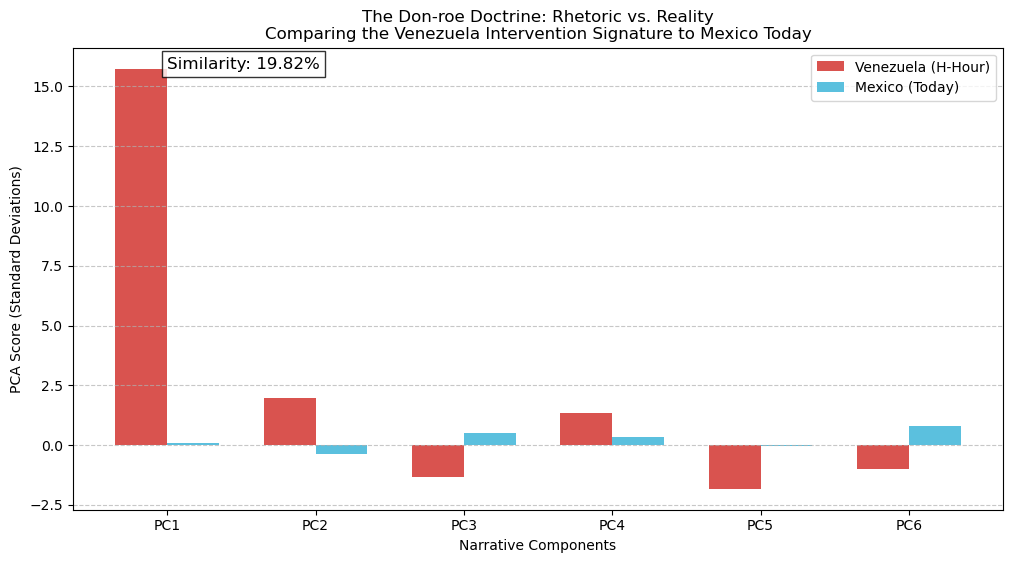

In [25]:
# Create a DataFrame comparing the two signatures
comparison_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(6)],
    'Venezuela (Intervention)': venezuela_signature,  # The "Target"
    'Mexico (Current)': mexico_today                  # The "Test"
})

# Plot the Comparison
plt.figure(figsize=(12, 6))

# We use a grouped bar chart
x = np.arange(len(comparison_df))
width = 0.35

plt.bar(x - width/2, comparison_df['Venezuela (Intervention)'], width, label='Venezuela (H-Hour)', color='#d9534f')
plt.bar(x + width/2, comparison_df['Mexico (Current)'], width, label='Mexico (Today)', color='#5bc0de')

# Labels and Styling
plt.xlabel('Narrative Components')
plt.ylabel('PCA Score (Standard Deviations)')
plt.title('The Don-roe Doctrine: Rhetoric vs. Reality\nComparing the Venezuela Intervention Signature to Mexico Today')
plt.xticks(x, comparison_df['Component'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the Similarity Score to the plot
plt.text(0, max(venezuela_signature), f"Similarity: {similarity:.2f}%", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

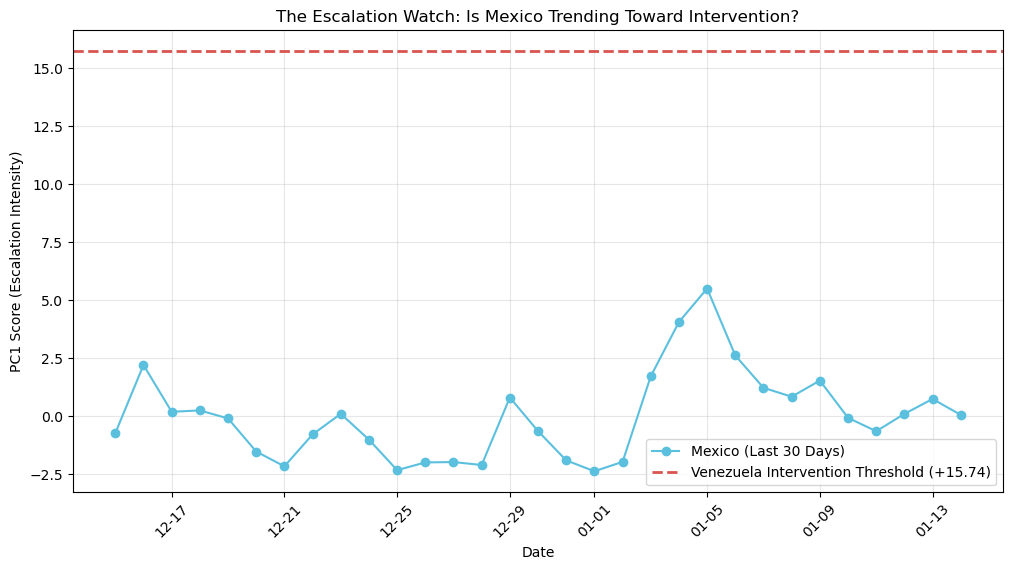

In [26]:
# Let's look to see if there is a trend going up over time
# Get dates for the Mexico data 
mexico_dates = pd.to_datetime(df_mexico['Date']) 

# Extract just the PC1 scores
mexico_pc1_scores = mexico_pca[:, 0] 

# Create the Trajectory Plot
plt.figure(figsize=(12, 6))
plt.plot(mexico_dates, mexico_pc1_scores, marker='o', linestyle='-', color='#5bc0de', label='Mexico (Last 30 Days)')

# Add the "Red Line" 
plt.axhline(y=15.74, color='#d9534f', linestyle='--', linewidth=2, label='Venezuela Intervention Threshold (+15.74)')

# Styling
plt.title('The Escalation Watch: Is Mexico Trending Toward Intervention?')
plt.ylabel('PC1 Score (Escalation Intensity)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)

# Format the x-axis dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

plt.show()

# Executive Summary: The Don-roe Doctrine Predictive Model

**Objective:** To determine if current U.S. narrative trends regarding Mexico indicate an imminent military intervention, using the January 2026 Venezuela "Operation Absolute Resolve" as a baseline.

**Methodology:** - Extracted 14 narrative features (Sentiment, Tone, and GDELT Themes) via BigQuery.
- Reduced dimensionality using Principal Component Analysis (PCA) to isolate the "Escalation Vector" (PC1).
- Established an **Intervention Signature** of **15.74** based on the 24-hour window prior to the Venezuela strike.

**Key Findings:**
1. **The Threshold Gap:** As of mid-January 2026, Mexico's highest Escalation Score (PC1) reached **5.5** on January 5th. This represents only **34.9%** of the intensity required for a kinetic intervention based on historical modeling.
2. **Volatility vs. Coordination:** While the Mexico narrative is volatile (swinging between -2.5 and 5.5), it lacks the sustained "narrative fusion" (Military + President + Crisis) that characterized the Venezuela launch.
3. **The PC6 Marker:** A high PC6 score (+1.0) suggests that current interest is driven primarily by investigative reporting and policy "leaks" rather than an active operational deployment.

**Conclusion:** The model currently assesses the risk of imminent military intervention in Mexico as **Low**. Current rhetoric serves as political pressure (Saber-Rattling) rather than a precursor to land-based operations.